# Utility vs. k

Results are produced by executing script **real.sh** and they are presented in Figure 2.

In [1]:
import os
os.chdir("../")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
import glob
import json
from lib import utils
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
sns.set_context("paper", font_scale=4)

In [3]:
name="real"
datas="fico"
final_df = []
cols = sns.color_palette("husl",n_colors=5)

col_dict = {"Black box": cols[0],
            "Minimum cost": cols[1],
            "Diverse": cols[2],
            "Algorithm 1": cols[3],
            "Algorithm 2": cols[4]
           }

mark_dict = {"Black box": 'o',
            "Minimum cost": '^',
            "Diverse": 'D',
            "Algorithm 1": 's',
            "Algorithm 2": 'v'
           }

style_dict = {"Black box": '-',
            "Minimum cost": '--',
            "Diverse": '-.',
            "Algorithm 1": ':',
            "Algorithm 2": '--'
           }

In [4]:
files = glob.glob("./outputs/{name}_mincost_data_{datas}*_config.json".format(name=name, datas=datas))
data = []

for fi in files:
    with open(fi,"r") as file:
        data.append(json.load(file))
df_standard = pd.DataFrame(data)
final_df.append(df_standard.melt(id_vars=["m", "k", "seed", "time", "best_responses", "alpha"], var_name="algorithm", value_name="utility"))

In [5]:
files = glob.glob("./outputs/{name}_maxcover_data_{datas}*_config.json".format(name=name, datas=datas))
data = []

for fi in files:
    with open(fi,"r") as file:
        data.append(json.load(file))
df_standard = pd.DataFrame(data)
final_df.append(df_standard.melt(id_vars=["m", "k", "seed", "time", "best_responses", "alpha"], var_name="algorithm", value_name="utility"))

In [6]:
files = glob.glob("./outputs/{name}_greedydet_data_{datas}*_config.json".format(name=name, datas=datas))
data = []

for fi in files:
    with open(fi,"r") as file:
        data.append(json.load(file))
df_standard = pd.DataFrame(data)
final_df.append(df_standard.melt(id_vars=["m", "k", "seed", "time", "best_responses", "alpha"], var_name="algorithm", value_name="utility"))

In [7]:
files = glob.glob("./outputs/{name}_greedyrand_data_{datas}*_config.json".format(name=name, datas=datas))
data = []

for fi in files:
    with open(fi,"r") as file:
        data.append(json.load(file))
df_standard = pd.DataFrame(data)
final_df.append(df_standard.melt(id_vars=["m", "k", "seed", "time", "best_responses", "pi", "alpha", "leaking_results"], var_name="algorithm", value_name="utility"))

In [8]:
df = pd.concat(final_df)

In [9]:
df['algorithm'] = df['algorithm'].str.replace("min_cost", "Minimum cost")
df['algorithm'] = df['algorithm'].str.replace("max_cover", "Diverse")
df['algorithm'] = df['algorithm'].str.replace("non_strategic", "Black box")
df['algorithm'] = df['algorithm'].str.replace("strategic", "Algorithm 1")
df['algorithm'] = df['algorithm'].str.replace("greedy_rand", "Algorithm 2")

In [10]:
df['algorithm'].unique()

array(['Minimum cost', 'Diverse', 'Algorithm 1', 'Black box',
       'Algorithm 2'], dtype=object)

In [11]:
if datas=='fico':
    df=df[df['k']<=20]

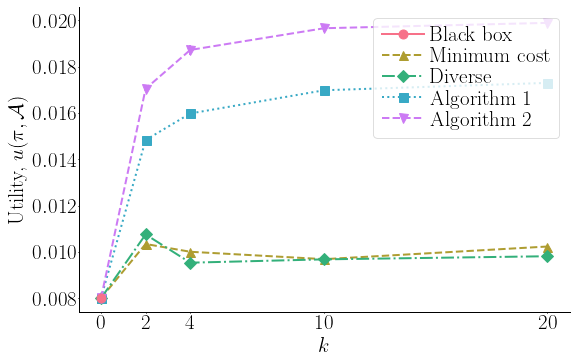

In [12]:
utils.latexify(8.8,5.5, font_scale=3.0)
df.sort_values(["algorithm"], inplace=True)
lines={}
algorithms=["Black box", "Minimum cost", "Diverse", "Algorithm 1", "Algorithm 2"]
ks=df['k'].unique()
for alg in algorithms:
    lines[alg]=[]
    for x_val in ks:
        line_l=pd.DataFrame(df[(df['algorithm']==alg) & (df['k']==x_val)], columns=['utility']).values.tolist()
        lines[alg].append((x_val,np.mean(line_l),np.std(line_l)))

ax=plt.subplot(111)
ax.plot([0], lines[algorithms[0]][0][1], linestyle=style_dict[algorithms[0]], marker=mark_dict[algorithms[0]], label='Black box', markersize=9, color=col_dict[algorithms[0]], linewidth=2, zorder=20)
for alg in algorithms[1:]:
    line_sorted=sorted(lines[alg], key=lambda x:x[0])
    x_vals=[0]+[x[0] for x in line_sorted]
    y_vals=[lines[algorithms[0]][0][1]]+[x[1] for x in line_sorted]
    y_err=[lines[algorithms[0]][0][2]]+[x[2] for x in line_sorted]
    if alg=='Algorithm 2':
        ax.errorbar(x_vals, y_vals, yerr=y_err, linestyle=style_dict[alg], label=alg, marker=mark_dict[alg], markersize=9, color=col_dict[alg], linewidth=2)
    else:
        ax.plot(x_vals, y_vals, linestyle=style_dict[alg], marker=mark_dict[alg], label=alg, markersize=9, color=col_dict[alg], linewidth=2)


handles,_ = ax.get_legend_handles_labels()
handles[4] = handles[4][0]
l = plt.legend(handles, algorithms, shadow=None, loc=1,labelspacing=0.1, handletextpad=0.3)
plt.ylabel("Utility, $u(\\pi,\\mathcal{A})$")
plt.xlabel("$k$")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(x_vals)
plt.savefig("./figures/{name}_{datas}_k_u.pdf".format(name=name, datas=datas),bbox_inches='tight', )